In [1]:
import pandas as pd

df = pd.read_csv('ufo_sighting_data.csv')
df.head(10)

C:\Users\serde.DESKTOP-S2S4NFG\AppData\Local\Temp\ipykernel_2084\380769724.py:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ufo_sighting_data.csv')


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


# 1. Data Preprocessing

In [2]:
#Checking data types and count of null values for each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date_time                        80332 non-null  object 
 1   city                             80332 non-null  object 
 2   state/province                   74535 non-null  object 
 3   country                          70662 non-null  object 
 4   UFO_shape                        78400 non-null  object 
 5   length_of_encounter_seconds      80332 non-null  object 
 6   described_duration_of_encounter  80332 non-null  object 
 7   description                      80317 non-null  object 
 8   date_documented                  80332 non-null  object 
 9   latitude                         80332 non-null  object 
 10  longitude                        80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [3]:
#Checking and fixing invalid values in 'Date_time' attribute
temp_col = pd.to_datetime(df['Date_time'], errors='coerce')
print('Count of invalid values in Date_time attribute:',temp_col.isna().sum())

invalid_values_indexes = temp_col.index[temp_col.isna()].tolist()

print('Invalid datetime values:')
print(df.loc[invalid_values_indexes, 'Date_time'])

#As we can see, the problem is the availability of 24 hours, which is incorrect
#Let's change 24 hours to 00
ch_count = 0
for i in range(df.shape[0]):
    d_t_parts = df.loc[i, 'Date_time'].split(' ')
    t_parts = d_t_parts[1].split(':')
    if t_parts[0] == '24':
        t_parts[0] = '00'
        df.loc[i, 'Date_time'] = d_t_parts[0] + ' ' + t_parts[0] + ':' + t_parts[1]
        ch_count += 1

print()
print(ch_count, 'values have been changed!')

#Changing data type to datetime
df['Date_time'] = pd.to_datetime(df['Date_time'], errors = 'coerce')
df.info()

Count of invalid values in Date_time attribute: 694
Invalid datetime values:
388      10/11/2006 24:00
693       10/1/2001 24:00
962       10/1/2012 24:00
1067     10/12/2003 24:00
1221     10/12/2013 24:00
               ...       
79136      9/4/2005 24:00
79137      9/4/2005 24:00
79740      9/7/2002 24:00
79759      9/7/2004 24:00
79942      9/8/2003 24:00
Name: Date_time, Length: 694, dtype: object

694 values have been changed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date_time                        80332 non-null  datetime64[ns]
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   UFO_shape                        7

In [4]:
#Normalizing the city attribute by changing the case of the first letters of words to upper case and deleting entries in brackets
df['city'] = df['city'].str.title()

for i in range(df.shape[0]):
    if '(' in df.loc[i, 'city']:
        df.loc[i, 'city'] = df.loc[i, 'city'].split('(')[0].strip()

df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,Lackland Afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,Chester,NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,Edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [5]:
#Normalizing state and country attributes
df['state/province'] = df['state/province'].str.upper()
df['country'] = df['country'].str.upper()

#Checking all possible values of the country attribute
print('All countries:', df['country'].unique())

print('States with NaN countries:\n',df.loc[df.country.isna(), 'state/province'])

#It turns out that where the state attribute value is present, it is most likely the United States of America. But there is no guarantee that this is true :)

All countries: ['US' nan 'GB' 'CA' 'AU' 'DE']
States with NaN countries:
 1         TX
18       NaN
29        AB
35       NaN
40        NY
        ... 
80238     CO
80244     ME
80319     NJ
80322    NaN
80324     NC
Name: state/province, Length: 9670, dtype: object


In [6]:
#Normalizing UFO_shape attribute
df['UFO_shape'] = df['UFO_shape'].str.title()

#Checking all possible values of the UFO_shape attribute
print('All UFO shapes:', df['UFO_shape'].unique())

#Replacing NaN values to 'unknown'
df['UFO_shape'] = df['UFO_shape'].fillna('unknown')

df.info()

All UFO shapes: ['Cylinder' 'Light' 'Circle' 'Sphere' 'Disk' 'Fireball' 'Unknown' 'Oval'
 'Other' 'Cigar' 'Rectangle' 'Chevron' 'Triangle' 'Formation' nan 'Delta'
 'Changing' 'Egg' 'Diamond' 'Flash' 'Teardrop' 'Cone' 'Cross' 'Pyramid'
 'Round' 'Crescent' 'Flare' 'Hexagon' 'Dome' 'Changed']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date_time                        80332 non-null  datetime64[ns]
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   UFO_shape                        80332 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  object        
 6   described_duration_of_encounter  80332 non-

In [7]:
#Checking and fixing invalid values in 'length_of_encounter_seconds' attribute
temp_col = pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce')
print('Count of invalid values:', temp_col.isna().sum())

invalid_values_indexes = temp_col.index[temp_col.isna()].tolist()

print('Invalid length_of_encounter_seconds values:')
print(df.loc[invalid_values_indexes, 'length_of_encounter_seconds'])

#It seems that it will simply be enough for us to remove the extra apostrophe (^-^)
df.loc[invalid_values_indexes, 'length_of_encounter_seconds'] = df.loc[invalid_values_indexes, 'length_of_encounter_seconds'].str.replace('`','')

#Changing data type to numeric
df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce')
df.info()

Count of invalid values: 3
Invalid length_of_encounter_seconds values:
27822      2`
35692      8`
58591    0.5`
Name: length_of_encounter_seconds, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date_time                        80332 non-null  datetime64[ns]
 1   city                             80332 non-null  object        
 2   state/province                   74535 non-null  object        
 3   country                          70662 non-null  object        
 4   UFO_shape                        80332 non-null  object        
 5   length_of_encounter_seconds      80332 non-null  float64       
 6   described_duration_of_encounter  80332 non-null  object        
 7   description                      80317 non-null  object        
 8   date_documented                  8

In [8]:
#It seems that column 'described_duration_of_encounter' repeats the data of column 'length_of_encounter_seconds', only it is messier. So it can be removed
df.drop('described_duration_of_encounter', axis=1, inplace = True)

In [9]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,date_documented,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,1949-10-10 21:00:00,Lackland Afb,TX,NaN,Light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,1955-10-10 17:00:00,Chester,NaN,GB,Circle,20.0,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [10]:
#The column with the description can not be processed, since it contains a text written down from the words of those people who observed the UFO. It's better to leave it the way it is
#Checking the date_documented attribute, because it is not yet defined as datetime

temp_col = pd.to_datetime(df['date_documented'], errors='coerce')
print('Count of invalid date values:', temp_col.isna().sum())

#Well, it looks like all values are valid. So let's change data type to datetime
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')
df.info()

Count of invalid date values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    80332 non-null  datetime64[ns]
 1   city                         80332 non-null  object        
 2   state/province               74535 non-null  object        
 3   country                      70662 non-null  object        
 4   UFO_shape                    80332 non-null  object        
 5   length_of_encounter_seconds  80332 non-null  float64       
 6   description                  80317 non-null  object        
 7   date_documented              80332 non-null  datetime64[ns]
 8   latitude                     80332 non-null  object        
 9   longitude                    80332 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 6.1+ MB


In [11]:
#Checking the latitude column and finding invalid values

temp_col = pd.to_numeric(df['latitude'], errors='coerce')
print('latitude invalid values count:', temp_col.isna().sum())

#Well, there is only one invalid value!
invalid_values_indexes = temp_col.index[temp_col.isna()].tolist()
print('Invalid value is:', df.loc[invalid_values_indexes, 'latitude'])

#It will simply be enough to get rid of the symbol 'q' at position 43782
df.loc[invalid_values_indexes, 'latitude'] = df.loc[invalid_values_indexes, 'latitude'].str.replace('q', '')

#Changing data type to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df.info()

latitude invalid values count: 1
Invalid value is: 43782    33q.200088
Name: latitude, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date_time                    80332 non-null  datetime64[ns]
 1   city                         80332 non-null  object        
 2   state/province               74535 non-null  object        
 3   country                      70662 non-null  object        
 4   UFO_shape                    80332 non-null  object        
 5   length_of_encounter_seconds  80332 non-null  float64       
 6   description                  80317 non-null  object        
 7   date_documented              80332 non-null  datetime64[ns]
 8   latitude                     80332 non-null  float64       
 9   longitude                    80332 non-null  float64       
dtypes: da

In [12]:
#Data Preprocessing done! :)
df.head(10)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,date_documented,latitude,longitude
0,1949-10-10 20:30:00,San Marcos,TX,US,Cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,Lackland Afb,TX,NaN,Light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,Chester,NaN,GB,Circle,20.0,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,Edna,TX,US,Circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,Kaneohe,HI,US,Light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
5,1961-10-10 19:00:00,Bristol,TN,US,Sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
6,1965-10-10 21:00:00,Penarth,NaN,GB,Circle,180.0,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000
7,1965-10-10 23:45:00,Norwalk,CT,US,Disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333
8,1966-10-10 20:00:00,Pell City,AL,US,Disk,180.0,Strobe Lighted disk shape object observed clos...,2009-03-19,33.586111,-86.286111
9,1966-10-10 21:00:00,Live Oak,FL,US,Disk,120.0,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.294722,-82.984167


# 2. Data Analysis and Visualization

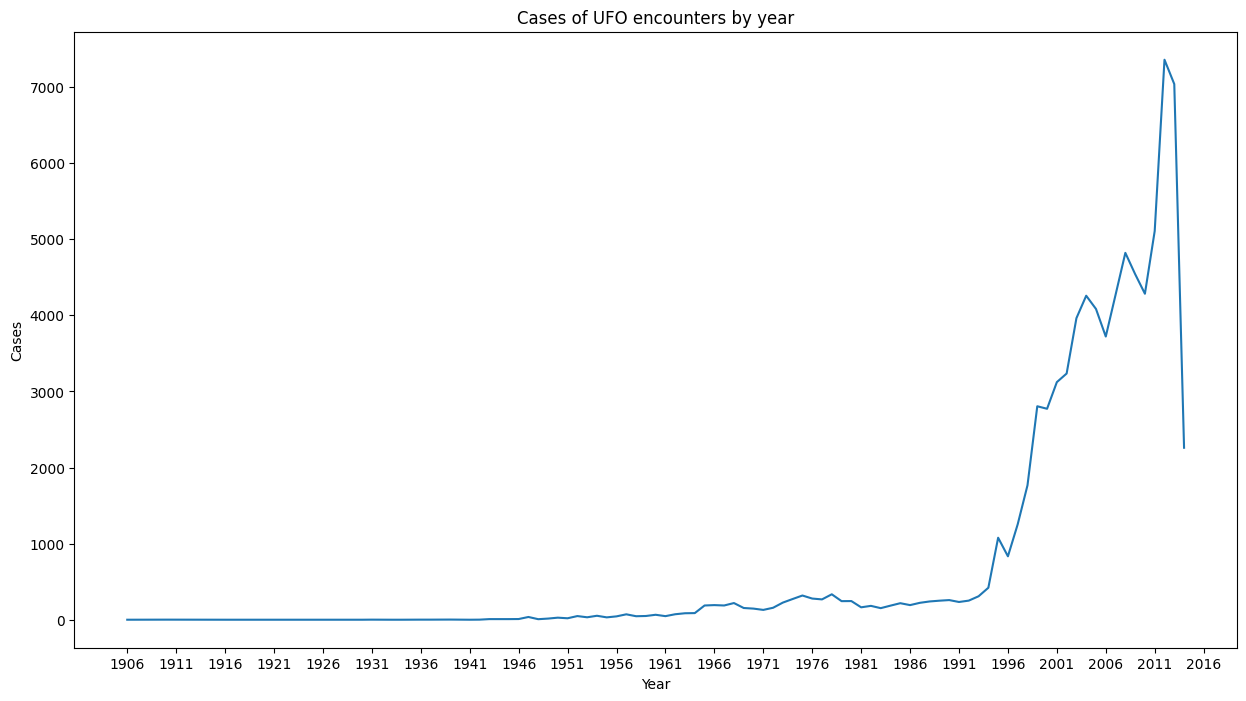

In [45]:
#Drawing a graph of cases of UFO encounters by year
import matplotlib.pyplot as plt

groups_series = df['Date_time'].dt.year.value_counts().sort_index()

plt.figure(figsize =(15,8))
plt.title('Cases of UFO encounters by year')
plt.xlabel('Year')
plt.ylabel('Cases')

plt.plot(groups_series)
plt.xticks(range(groups_series.index.min(), 2019, 5))
plt.show()

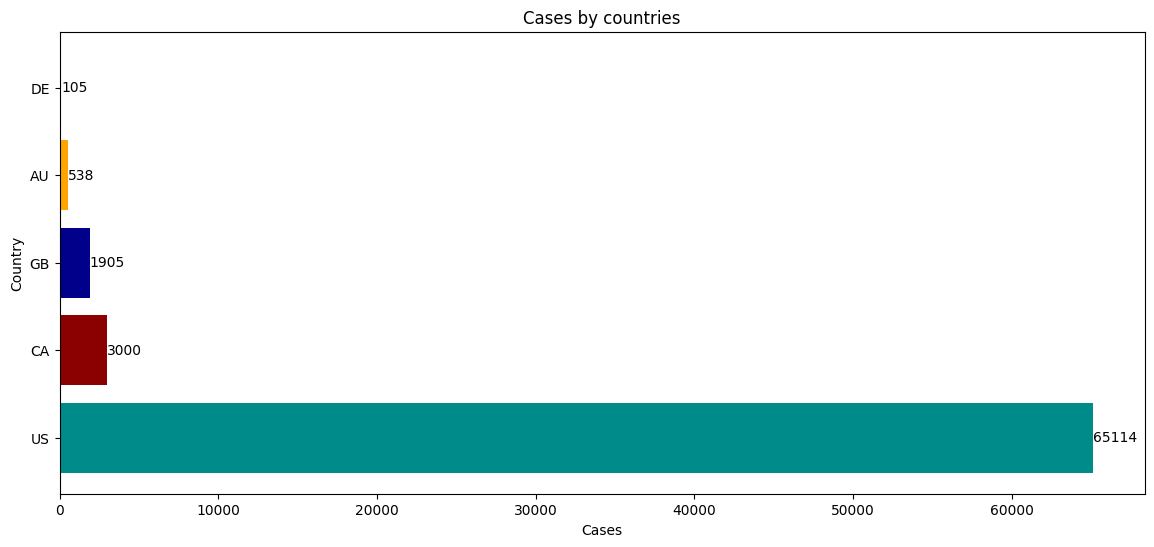

In [77]:
#Drawing a graph of cases of UFO encounters by country
country_series = df['country'].value_counts()

plt.figure(figsize = (14,6))

plt.barh(country_series.index, country_series.values, color = ['darkcyan', 'darkred', 'darkblue', 'orange', 'violet'])
plt.title('Cases by countries')
plt.xlabel('Cases')
plt.ylabel('Country')

i = 0
for count in country_series.values:
    plt.text(count, i, str(count), ha = 'left', va = 'center')
    i += 1

In [89]:
min = df['length_of_encounter_seconds'].mean() // 60
sec = round(df['length_of_encounter_seconds'].mean() % 60, 0)

print('Average length of encounter:', int(min), 'mins', int(sec), 'seconds')

Average length of encounter: 150 mins 17 seconds


C:\Users\serde.DESKTOP-S2S4NFG\AppData\Local\Temp\ipykernel_2084\3531303080.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


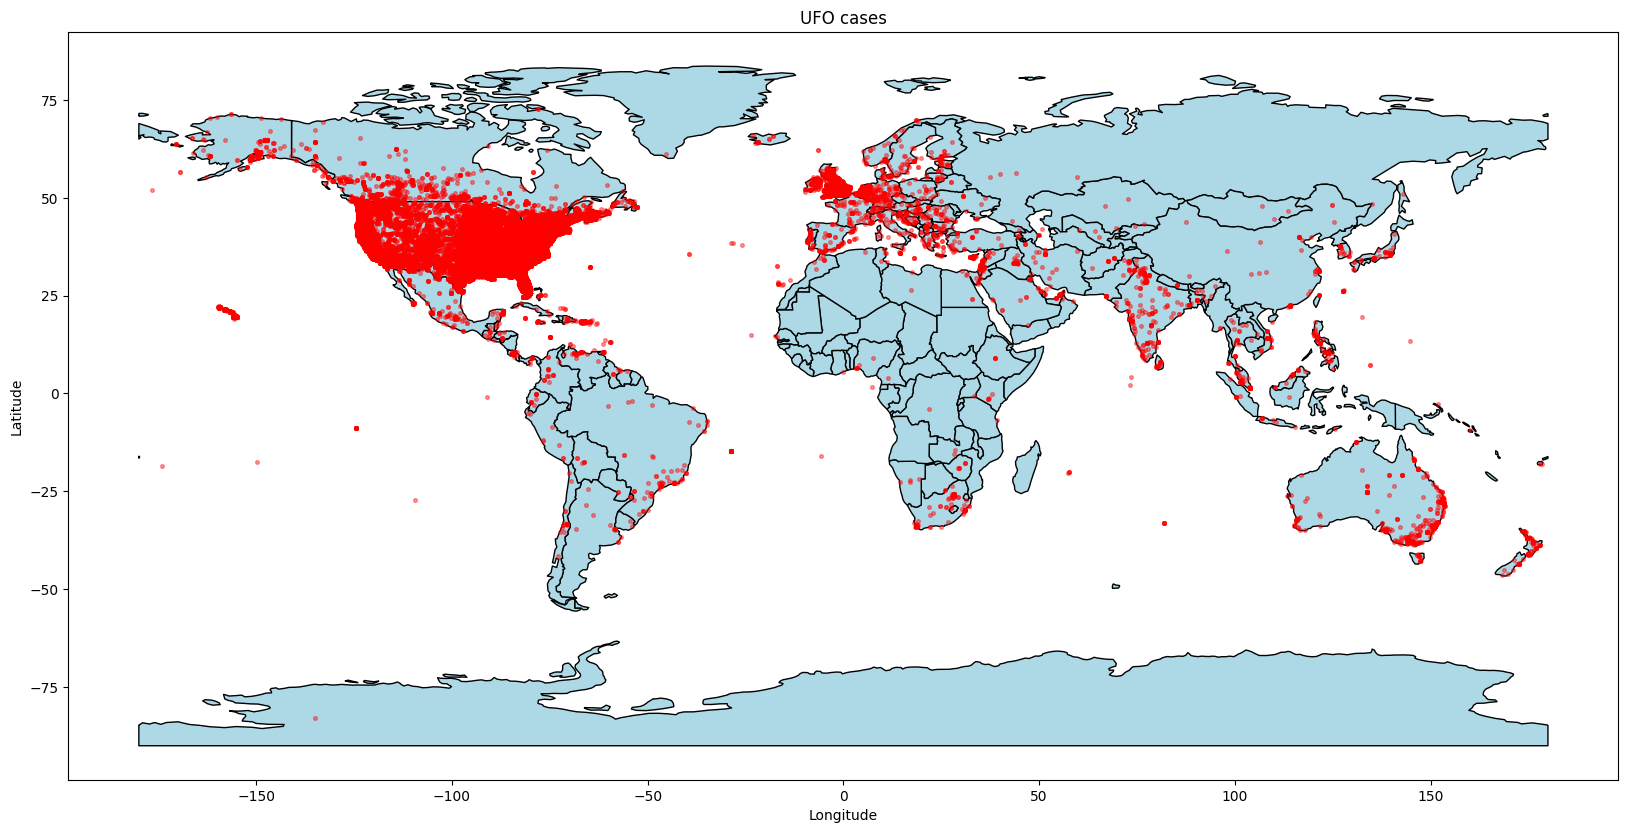

In [115]:
import geopandas as gpd

geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(20,20))
world.plot(ax=ax, color='lightblue', edgecolor='black')
gdf.plot(ax=ax, markersize=7, color='red', alpha=0.4)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('UFO cases')

plt.show()